To avoid overfiting on the data, there is a need to used cross-validation to ensure the model obtained would be quite useful for future usage. MOST ATTENTION IS TO BE GIVEN TO THE PERFORMANCE OF MODEL ON TEST SETS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures as polyf
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold

In [2]:
#load dataset
df = pd.read_excel('/Users/emmanuelakeweje/Downloads/drop_update_to_Emma.xlsx',skiprows=[0,1], usecols = 'C:N')
df.drop(['i','h','X','Y'], axis =1, inplace=True)
df.head()

,a,b,c,d,e,f,g,Eta
0,0.00052,0.00011,0.0675,0.001,0.048656,0.0,0.000428,11.269565
1,0.00052,0.00011,0.0675,0.001,0.059076,0.0,0.000356,6.058537
2,0.00052,0.00011,0.0675,0.001,0.101094,0.0,0.000246,3.385401
3,0.00052,0.00011,0.0675,0.001,0.174272,0.0,0.000164,2.467416
4,0.00047,0.00011,0.0675,0.001,0.044396,0.0,0.000354,7.908621


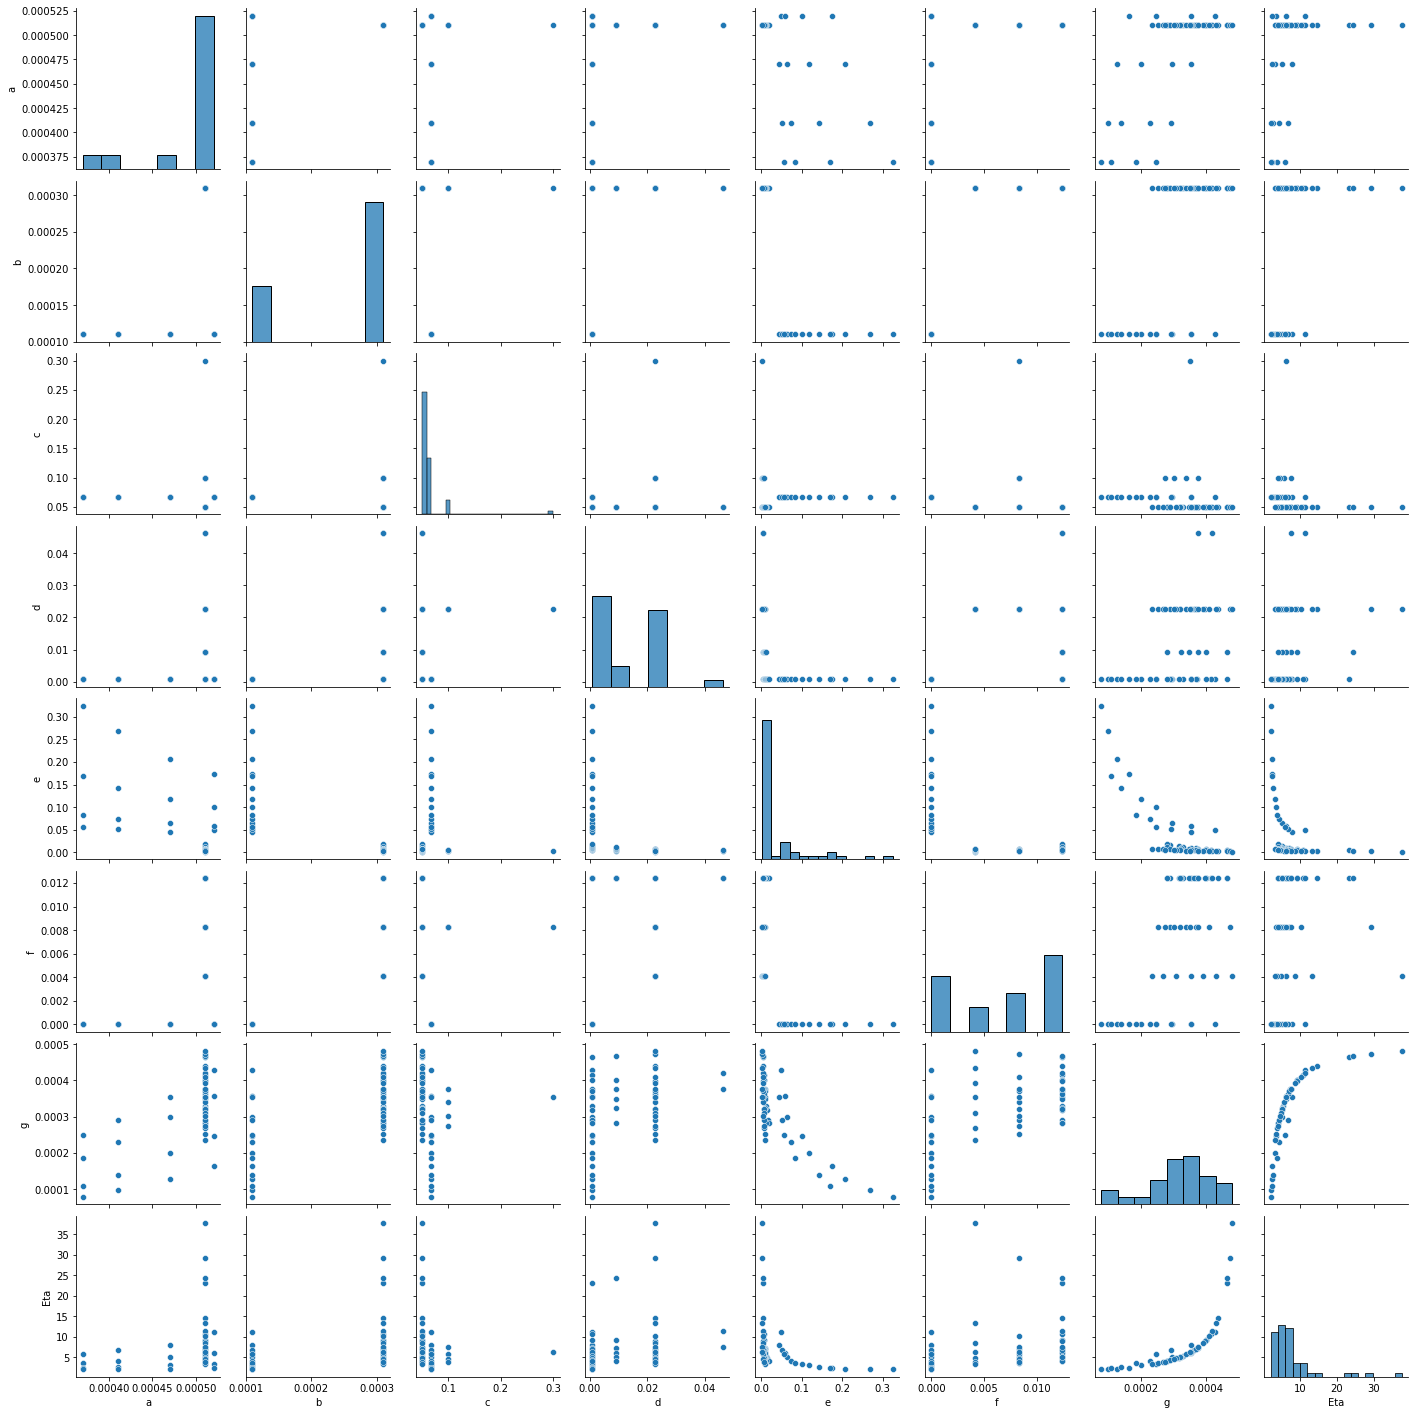

In [3]:
#visualization of collinearity between variables
sns.pairplot(df, kind="scatter")

In [4]:
## 5-fold cross validation linear regression
X = df.drop(['Eta'], axis = 1)
y = df['Eta']
kf = KFold(n_splits=5,random_state=42, shuffle=True)
# scores = {}
for i,(train_index, test_index) in enumerate(kf.split(X)):
    X_train =  X.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_train =  y.iloc[train_index]
    y_test = y.iloc[test_index]
    ##linear model
    reg = LR(fit_intercept=False).fit(X_train,y_train)
    print(f'Train: {reg.score(X_train,y_train)}, \t Test: {reg.score(X_test,y_test)}')

Train: 0.7176549389543124, 	 Test: 0.5810614901394704
Train: 0.7476688661441953, 	 Test: -2.517436862620068
Train: 0.7140102047101973, 	 Test: -0.006870516656352077
Train: 0.7308424214066584, 	 Test: -0.3879751892836556
Train: 0.6929956057335487, 	 Test: 0.7052013495204151


In [5]:
## 5-fold cross validation ploynomial regression
X = df.drop(['Eta'], axis = 1)
y = df['Eta']
kf = KFold(n_splits=5,random_state=42, shuffle=True)
# scores = {}
for i,(train_index, test_index) in enumerate(kf.split(X)):
    X_train =  X.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_train =  y.iloc[train_index]
    y_test = y.iloc[test_index]
    pf = polyf(2, interaction_only=False, include_bias = False)
    X_train = pf.fit_transform(X_train)
    ##linear model
    reg = LR(fit_intercept=False).fit(X_train,y_train)
    ## scoring test set
    X_test = pf.transform(X_test)
#     scores[f'train_{i}'] = 
    print(f'Train: {reg.score(X_train,y_train)}, \t Test: {reg.score(X_test,y_test)}')
#     scores[f'test_{i}'] = reg.score(X_test,y_test)
# print(scores)

Train: 0.9690506499473815, 	 Test: 0.804870499582154
Train: 0.9607770060082359, 	 Test: 0.402798623536741
Train: 0.9628992178899571, 	 Test: -2.8955789386996815
Train: 0.9816841144833902, 	 Test: -0.4106129720549645
Train: 0.9432887452394105, 	 Test: -12714.22629019929


In [6]:
## 5-fold cross validation polynomial regression with Lasso
X = df.drop(['Eta'], axis = 1)
y = df['Eta']
kf = KFold(n_splits=5,random_state=42, shuffle=True)
# scores = {}
for i,(train_index, test_index) in enumerate(kf.split(X)):
    X_train =  X.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_train =  y.iloc[train_index]
    y_test = y.iloc[test_index]
    pf = polyf(2, interaction_only=False, include_bias = False)
    X_train = pf.fit_transform(X_train)
    ##linear model
    reg = Lasso(alpha = 1e-10,fit_intercept=False, max_iter = 10000).fit(X_train,y_train)
    ## scoring test set
    X_test = pf.transform(X_test)
    print(f'Train: {reg.score(X_train,y_train)}, \t Test: {reg.score(X_test,y_test)}')

Train: 0.9432800442167061, 	 Test: 0.6871579348301879
Train: 0.9363437497912859, 	 Test: -0.05989963713998159
Train: 0.922064797468297, 	 Test: -6.1048498709108525
Train: 0.9574732575430777, 	 Test: -0.5972700691580257
Train: 0.9165660626037831, 	 Test: 0.3363116343370912


/Users/emmanuelakeweje/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.190211751359314, tolerance: 0.3211682943236068
  model = cd_fast.enet_coordinate_descent(
/Users/emmanuelakeweje/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.84713542325174, tolerance: 0.5161137416779153
  model = cd_fast.enet_coordinate_descent(
/Users/emmanuelakeweje/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.45259089150272, tolerance: 0.4834425347901789
  model = cd_fast.enet_coordinate_descent(
/Users/emmanuelakeweje/opt/anaconda3/li

## How about $\eta = a1\cdot\log a + b1\cdot\log b + c1\cdot\log c + \cdots +g1\cdot\log g + const.$

In [7]:
## 5-fold cross validation log
X = df.drop(['Eta'], axis = 1)
##drop variable because of NaN entries
X.drop('f', axis =1, inplace=True)
y = df['Eta']
kf = KFold(n_splits=5,random_state=42, shuffle=True)
# scores = {}
for i,(train_index, test_index) in enumerate(kf.split(X)):
    X_train =  X.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_train =  y.iloc[train_index]
    y_test = y.iloc[test_index]
    log_transformer = FunctionTransformer(np.log)
    X_train = log_transformer.transform(X_train)
    ##linear model
    reg = LR(fit_intercept=True).fit(X_train,y_train)
    ## scoring test set
    X_test = log_transformer.transform(X_test)
    print(f'Train: {reg.score(X_train,y_train)}, \t Test: {reg.score(X_test,y_test)}')

Train: 0.6016284252412287, 	 Test: 0.6510283479505595
Train: 0.7359440398487491, 	 Test: -1.7797770192064046
Train: 0.7204398805851441, 	 Test: 0.4110883814683738
Train: 0.7125288534720939, 	 Test: 0.04664247710355218
Train: 0.7310979515348042, 	 Test: 0.5481511814664524



## How about $\eta = a^{a1}b^{b1}\cdots g^{g1}\cdot const$

In [8]:
## 5-fold cross validation exponents
X = df.drop(['Eta'], axis = 1)
##drop variable because of NaN entries
X.drop('f', axis =1, inplace=True)
y = np.log(df['Eta'])
kf = KFold(n_splits=5,random_state=42, shuffle=True)
# scores = {}
for i,(train_index, test_index) in enumerate(kf.split(X)):
    X_train =  X.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_train =  y.iloc[train_index]
    y_test = y.iloc[test_index]
    log_transformer = FunctionTransformer(np.log)
    X_train = log_transformer.transform(X_train)
    ##linear model
    reg = LR(fit_intercept=True).fit(X_train,y_train)
    ## scoring test set
    X_test = log_transformer.transform(X_test)
    print(f'Train: {reg.score(X_train,y_train)}, \t Test: {reg.score(X_test,y_test)}')

Train: 0.8660322862350759, 	 Test: 0.8157393911094024
Train: 0.8720034291454912, 	 Test: 0.7121248901340348
Train: 0.8892557490976896, 	 Test: 0.7035948256919258
Train: 0.8629480930509439, 	 Test: 0.8776346865595357
Train: 0.865927232354217, 	 Test: 0.8404156188157281


Any help with lasso??

In [9]:
## 5-fold cross validation exponents
X = df.drop(['Eta'], axis = 1)
##drop variable because of NaN entries
X.drop('f', axis =1, inplace=True)
y = np.log(df['Eta'])
kf = KFold(n_splits=5,random_state=42, shuffle=True)
# scores = {}
for i,(train_index, test_index) in enumerate(kf.split(X)):
    X_train =  X.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_train =  y.iloc[train_index]
    y_test = y.iloc[test_index]
    log_transformer = FunctionTransformer(np.log)
    X_train = log_transformer.transform(X_train)
    ##linear model
    reg = Lasso(alpha=1e-3, max_iter = 10000000, fit_intercept=True).fit(X_train,y_train)
    ## scoring test set
    X_test = log_transformer.transform(X_test)
    print(f'Train: {reg.score(X_train,y_train)}, \t Test: {reg.score(X_test,y_test)}')#, \n Exponents: {reg.coef_}')

Train: 0.8641853633227448, 	 Test: 0.8302262824542855
Train: 0.8717789421906273, 	 Test: 0.7255426854762171
Train: 0.8887794030332967, 	 Test: 0.7108806188146845
Train: 0.8621271544328348, 	 Test: 0.898002090486111
Train: 0.8655906899322967, 	 Test: 0.8474742719339883


## The relation has the best estimation on the test sets $\eta = a^{a1}b^{b1}\cdots g^{g1}\cdot const$. 
To obtain the values of exponents, a1, b2, c1,... I train the model with the complete data..

In [10]:
X = df.drop(['Eta'], axis = 1)
##drop variable f because of NaN entries
X.drop('f', axis =1, inplace=True)
y = np.log(df['Eta'])
log_transformer = FunctionTransformer(np.log)
X = log_transformer.transform(X)
##linear model
reg = Lasso(alpha=1e-3, max_iter = 10000000, fit_intercept=True).fit(X,y)
## scoring
print(f'Accuracy: {reg.score(X,y)}, \n Exponents: {reg.coef_} \n Constant: {reg.intercept_}')

Accuracy: 0.8654625167964163, 
 Exponents: [-0.         -1.76895226 -0.59046827 -0.18871242 -0.95105636  0.05606193] 
 Constant: -19.36451882722872


Relationship obtained from data is approximately $$\eta = \frac{\exp^{-19.365} \cdot g^{0.056}}{ b^{1.769}\cdot c^{0.59}\cdot d^{0.189}\cdot e^{0.951}}.$$

Why a doesn't appear in the relation?? Recall that exponent of a is 0

What f doesn't appear in the relation?? We dropped f! Next, I would exploit this model while dropping the entities with missing f values

In [11]:
X = df.drop(['Eta'], axis = 1)
y = np.log(df['Eta'])[16:]
log_transformer = FunctionTransformer(np.log)
X = log_transformer.transform(X)
# drop inf
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
X.head()
##linear model
reg = Lasso(alpha=1e-3, max_iter = 10000000, fit_intercept=True).fit(X,y)
## scoring
print(f'Accuracy: {reg.score(X,y)}, \n Exponents: {reg.coef_} \n Constant: {reg.intercept_}')

Accuracy: 0.9243463366758582, 
 Exponents: [ 0.          0.         -0.55025819 -0.14851728 -0.92076148  0.23356394
  0.82472567] 
 Constant: 2.593170861312313


Accounting for variable f, lasso zerod out the contribution of 2 variables.... the aproximate relation is now
$$\eta = \frac{\exp^{2.593} \cdot f^{0.235} \cdot g^{0.825}}{ c^{0.55}\cdot d^{0.149}\cdot e^{0.921}}.$$

Now the exponents of a and b are 0

## Let's check predictions!

In [12]:
def check1(a,b,c,d,e,f,g):
    A = np.exp(-19.365)*(g**0.056)
    B = (b**1.769)*(c**0.59)*(d**0.189)*(e**0.951)
    return A/B

In [13]:
ind = 14
a,b,c,d,e,f,g,Eta = df.iloc[ind]
print(check1(a,b,c,d,e,f,g))
print(Eta)

2.298754100351398
2.365648854961832


In [14]:
def check2(a,b,c,d,e,f,g):
    A = np.exp(2.593)*(f**0.235)*(g**0.825)
    B = (c**0.55)*(d**0.149)*(e**0.921)
    return A/B

In [15]:
# for indices < 15, check2 returns a zero values since f=0
ind = 14
a,b,c,d,e,f,g,Eta = df.iloc[ind]
print(check2(a,b,c,d,e,f,g))
print(Eta)

0.0
2.365648854961832
